In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
!mkdir -p ~/.kaggle
from google.colab import drive
from google.colab import files
# Upload your kaggle.json API key
uploaded = files.upload()

drive.mount('/content/drive')

Saving kaggle.json to kaggle.json
Mounted at /content/drive


In [3]:
import os
import shutil
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Machine-learning'


In [4]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Machine-learning/hmnist_28_28_RGB.csv')

# Extract features and labels
X = data.drop(columns=['label']).values
y = data['label'].values

# Normalize the data
X = X / 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to categorical
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [6]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


17225924/17225924 [==============================] - 0s 0us/step


In [7]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(label_encoder.classes_), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [8]:
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [10]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

X_train_reshaped = X_train.reshape(-1, 28, 28, 3)

train_generator = datagen.flow(X_train_reshaped, y_train, subset='training')
val_generator = datagen.flow(X_train_reshaped, y_train, subset='validation')


In [11]:
history = model.fit(train_generator, validation_data=val_generator, epochs=10, steps_per_epoch=len(train_generator), validation_steps=len(val_generator))


Epoch 1/10
201/201 [==============================] - 57s 224ms/step - loss: nan - accuracy: 0.0326 - val_loss: nan - val_accuracy: 0.0306
Epoch 2/10
201/201 [==============================] - 44s 217ms/step - loss: nan - accuracy: 0.0326 - val_loss: nan - val_accuracy: 0.0306
Epoch 3/10
201/201 [==============================] - 48s 239ms/step - loss: nan - accuracy: 0.0326 - val_loss: nan - val_accuracy: 0.0306
Epoch 4/10
201/201 [==============================] - 44s 219ms/step - loss: nan - accuracy: 0.0326 - val_loss: nan - val_accuracy: 0.0306
Epoch 5/10
201/201 [==============================] - 44s 221ms/step - loss: nan - accuracy: 0.0326 - val_loss: nan - val_accuracy: 0.0306
Epoch 6/10
201/201 [==============================] - 47s 235ms/step - loss: nan - accuracy: 0.0326 - val_loss: nan - val_accuracy: 0.0306
Epoch 7/10
201/201 [==============================] - 43s 214ms/step - loss: nan - accuracy: 0.0326 - val_loss: nan - val_accuracy: 0.0306
Epoch 8/10
201/201 [=======

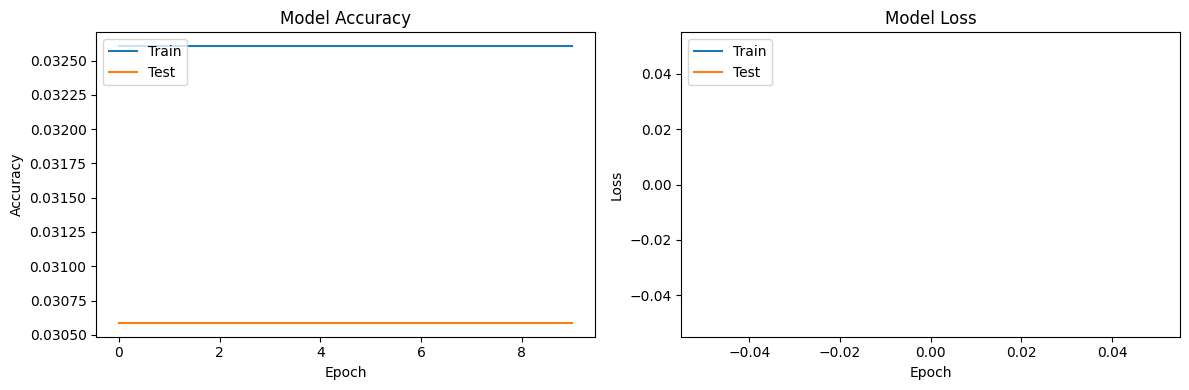

In [13]:
import matplotlib.pyplot as plt


# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
